In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

## 10.A Data Exploration

In [52]:
df = pd.read_csv("weekly.csv")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


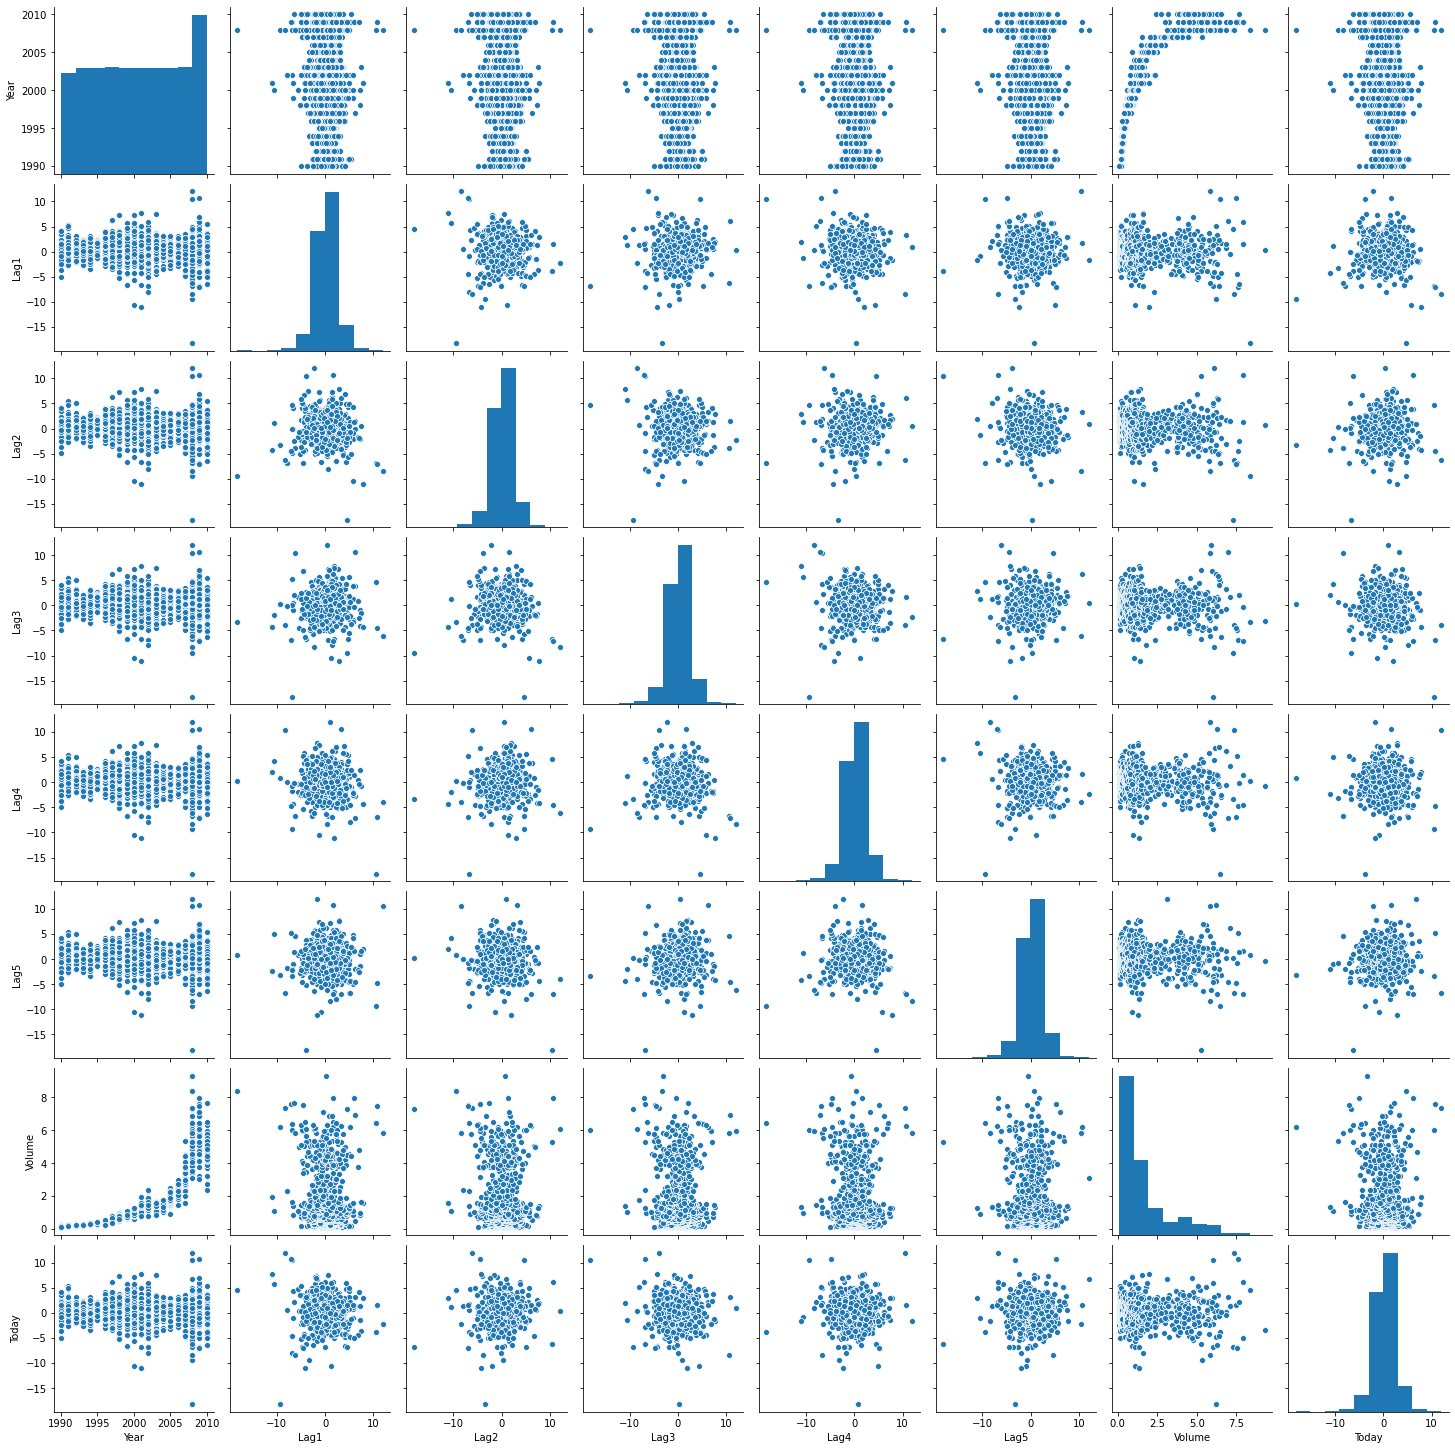

In [53]:
sns.pairplot(df)

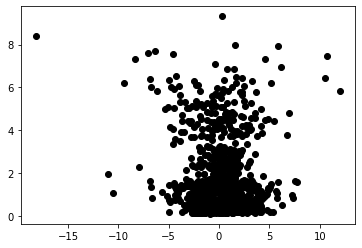

In [54]:
plt.scatter(df['Lag1'], df['Volume'], color = "black")

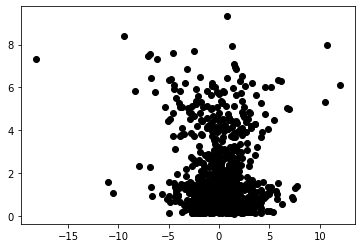

In [55]:
plt.scatter(df['Lag2'], df['Volume'], color = "black")

In [56]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [59]:
x = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df['Direction']
logi = linear_model.LogisticRegression(fit_intercept = True, C = 1e9)
logi.fit(x, y)

print(f'The coefficients are {logi.coef_}')

The coefficients are [[-0.04126771  0.05844169 -0.01606184 -0.02778928 -0.01447421 -0.02274122]]


## 10.b Logistic Regression

In [58]:
x = np.asarray(x)
df.Direction = df.Direction.astype("category")
num_y = pd.get_dummies(df.Direction).iloc[:, 1]
reglog = sm.Logit(num_y, sm.add_constant(x)).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4


F:\Program Files (x86)\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
F:\Program Files (x86)\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
F:\Program Files (x86)\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                     inf
Time:                        09:29:53   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
x1            -0.0413      0.026     -1.563      0.118      -0.093       0.010
x2             0.0584      0.027      2.175      0.030       0.006       0.111
x3            -0.0161      0.027     -0.602      0.547      -0.068       0.036
x4            -0.0278      0.026     -1.050      0.294      -0.080       0.024
x5            -0.0145      0.026     -0.549      0.583      -0.066       0.037
x6            -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

## 10.C Calculate the Confusion Matrix

In [72]:
pred_df = pd.DataFrame({"pred_prob_0": logi.predict_proba(x)[:,0],
                       "pred_prob_1": logi.predict_proba(x)[:,1],
                       "prediction": logi.predict(x),
                       'actual': y})
pred_df.head()

,pred_prob_0,pred_prob_1,prediction,actual
0,0.391373,0.608627,Up,Down
1,0.398970,0.601030,Up,Down
2,0.412429,0.587571,Up,Up
3,0.518358,0.481642,Down,Up
4,0.383099,0.616901,Up,Up


In [102]:
confusion_matrix = pd.DataFrame()
confusion_matrix.at[1,1] = pred_df[(pred_df['prediction'] == 'Up') & (pred_df['actual'] == 'Up')].shape[0]
confusion_matrix.at[1,0] = pred_df[(pred_df['prediction'] == 'Up') & (pred_df['actual'] == 'Down')].shape[0]
confusion_matrix.at[0,1] = pred_df[(pred_df['prediction'] == 'Down') & (pred_df['actual'] == 'Up')].shape[0]
confusion_matrix.at[0,0] = pred_df[(pred_df['prediction'] == 'Down') & (pred_df['actual'] == 'Down')].shape[0]
confusion_matrix

,1,0
1,557.0,430.0
0,48.0,54.0


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_mat = pd.DataFrame(confusion_matrix(y, logi.predict(x)))
conf_mat.columns.name = 'Actual'
conf_mat.index.name = 'Predicted'
conf_mat

Actual,0,1
Predicted,,
0,54,430
1,48,557


The confusion matrix tells us that the sensitivity is $\frac{557}{430+557}$ (i.e. percent of true "Up" direction identified). Specificity is $\frac{54}{54+48}$.(i.e. within the true "Down" direction, this percentage is identified.) 

Assume positive is 0, then Type I error is False positive rate, which is equal to $\frac{48}{54+48}$. Type I error is incorrectly predicting 1s when Actual is zero. Type II error is incorrectly predicting 0s when Actual is 1. It is equal to $\frac{430}{430+557}$

## 10.D Logistic Regression Using Training Data

In [162]:
df.Year = df.Year.astype('int')
df_train = df.loc[df.Year <= 2008]
df_test = df.loc[df.Year > 2008]

x_train = df_train.Lag2
x_train = x_train.values.reshape(-1,1)
y_train = df_train.Direction

x_test = df_test.Lag2
x_test = x_test.values.reshape(-1,1)
y_test = df_test.Direction


In [166]:
d_logi = linear_model.LogisticRegression(fit_intercept = True, C = 1e9)
d_logi.fit(x_train, y_train)
d_result = pd.DataFrame({'pred_0': d_logi.predict_proba(x_test)[:,0],
                         'pred_1': d_logi.predict_proba(x_test)[:,1],
                         'pred_direction': d_logi.predict(x_test),
                         'actual_direction': y_test})
d_result.head()

,pred_0,pred_1,pred_direction,actual_direction
985,0.473871,0.526129,Up,Down
986,0.355264,0.644736,Up,Down
987,0.513784,0.486216,Down,Down
988,0.514800,0.485200,Down,Down
989,0.480233,0.519767,Up,Up


In [174]:
conf_mat_d = pd.DataFrame(confusion_matrix(y_test, d_logi.predict(x_test)))
accuracy = d_result.loc[d_result.pred_direction == d_result.actual_direction].count()[1]/d_result.shape[0]
print(conf_mat_d)
print(accuracy)

   0   1
0  9  34
1  5  56
0.625


## 10.E Repeat D using LDA

In [177]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train, y_train)

lda_model.priors_

array([0.44771574, 0.55228426])

In [178]:
lda_model.means_

array([[-0.03568254],
       [ 0.26036581]])

Prior contains the group priors $\pi_k$ and counts the corresponding group counts, $N_k$. <br />
Means is the centroid matrix $M \in R^K$ whose components are the mean vectors, $\mu_k$. <br />
Scaling is the $𝑁\times(𝐾−1)$ matrix that transforms samples to the space defined by the 𝐾−1 discriminant variables. <br />
SVD are the singular values, which indicate the ratio of between- and within-group standard deviations on the linear discriminant variables.

In [182]:
lda_model.scalings_

array([[0.44141622]])

In [186]:
e_result = pd.DataFrame({'pred_0': lda_model.predict_proba(x_test)[:,0],
                         'pred_1': lda_model.predict_proba(x_test)[:,1],
                         'pred_direction': lda_model.predict(x_test),
                         'actual_direction': y_test})
conf_mat_e= pd.DataFrame(confusion_matrix(y_test, lda_model.predict(x_test)))
accuracy = e_result.loc[e_result.pred_direction == e_result.actual_direction].count()[1]/e_result.shape[0]
print(conf_mat_e)
print(accuracy)

   0   1
0  9  34
1  5  56
0.625


## 10.F Repeat D using QDA

In [187]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [188]:
qda_model.priors_

array([0.44771574, 0.55228426])

In [189]:
qda_model.means_

array([[-0.03568254],
       [ 0.26036581]])

In [190]:
qda_model.scalings_

[array([4.83781758]), array([5.37073888])]

In [191]:
f_result = pd.DataFrame({'pred_0': qda_model.predict_proba(x_test)[:,0],
                         'pred_1': qda_model.predict_proba(x_test)[:,1],
                         'pred_direction': qda_model.predict(x_test),
                         'actual_direction': y_test})
conf_mat_f= pd.DataFrame(confusion_matrix(y_test, qda_model.predict(x_test)))
accuracy = e_result.loc[f_result.pred_direction == f_result.actual_direction].count()[1]/f_result.shape[0]
print(conf_mat_f)
print(accuracy)

   0   1
0  0  43
1  0  61
0.5865384615384616


## 10.G Repeat D using KNN with K = 1

In [195]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 1 )
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [197]:
g_result = pd.DataFrame({'pred_0': knn_model.predict_proba(x_test)[:,0],
                         'pred_1': knn_model.predict_proba(x_test)[:,1],
                         'pred_direction': knn_model.predict(x_test),
                         'actual_direction': y_test})

conf_mat_g= pd.DataFrame(confusion_matrix(y_test, knn_model.predict(x_test)))
accuracy = e_result.loc[g_result.pred_direction == g_result.actual_direction].count()[1]/g_result.shape[0]
print(conf_mat_g)
print(accuracy)

    0   1
0  21  22
1  31  30
0.49038461538461536


## 10.H Explain Which Method is Better

LDA performs the best